In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [2]:
!ls

README.md  telco.xls  Untitled.ipynb


In [2]:
df=pd.read_csv("telco.xls")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [54]:
l=[]
for j in df['TotalCharges']:
    try : 
        l.append(float(j))
    except:
        print(j)

In [19]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [20]:
def missing_data_function(frame):
        total = frame.isnull().sum().sort_values(ascending=False)
        percent = (frame.isnull().sum()*100 / frame.isnull().count()).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        return missing_data

In [21]:
missing_data_function(df)

,Total,Percent
TotalCharges,11,0.156183
Churn,0,0.000000
OnlineSecurity,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000


In [ ]:
df = df[df["TotalCharges"].notnull()]

In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
pd.crosstab(df.Churn,df.gender)

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


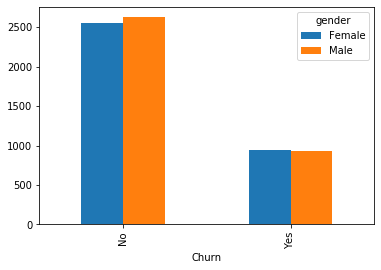

In [7]:
pd.crosstab(df.Churn,df.gender).plot(kind="bar")

In [16]:
pd.crosstab(df.Churn,df.Partner)

Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669


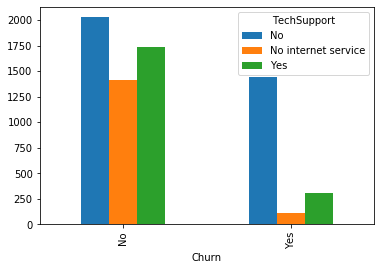

In [17]:
pd.crosstab(df.Churn,df.TechSupport).plot(kind="bar")

In [9]:
pd.crosstab(df.Churn,df.StreamingTV)

StreamingTV,No,No internet service,Yes
Churn,,,
No,1868,1413,1893
Yes,942,113,814


In [18]:
pd.crosstab(df.Churn,df.Contract)

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [19]:
pd.crosstab(df.Churn,df.Contract,margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


In [10]:
cross=pd.crosstab(df.Churn,df.Contract,margins=True)
cross["All"]['All']

7043

In [11]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
def corr(variable):
    cross=pd.crosstab(df["Churn"],df[variable],margins=True)
    chi=0
    for i in df[variable].unique():
        for j in df['Churn'].unique():
            e=cross[i]['All']*cross['All'][j]/cross['All']['All']
            chi=chi+((cross[i][j]-e)**2/e)
    free_deg=(df[variable].nunique()-1)*(df['Churn'].nunique()-1)
    p=math.sqrt(chi/(cross['All']['All']*math.sqrt(free_deg)))
    return p 
    


0.1938285901074124

In [13]:
categoricals=df.select_dtypes(include='object').drop(["TotalCharges","Churn"],axis=1).keys()

In [14]:
chi_dict={}
for cal in categoricals:
    chi_dict[cal]=corr(cal)

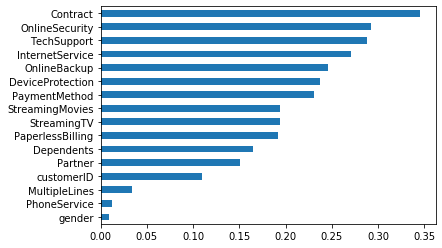

In [16]:
pd.Series(data=chi_dict).sort_values().plot(kind='barh')